In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

*** 
# підготовка даних 
***

In [15]:
# Завантаження даних
df = pd.read_csv("sources/Housing.csv")
print(df.info())  # Using print to display information in a script

# Нормалізація функцій
df["area"] = (df["area"] - df["area"].mean()) / df["area"].std()
df["bedrooms"] = (df["bedrooms"] - df["bedrooms"].mean()) / df["bedrooms"].std()
df["bathrooms"] = (df["bathrooms"] - df["bathrooms"].mean()) / df["bathrooms"].std()

# Додавання колонки одиниць для ухилу (intercept)
df.insert(0, "intercept", 1)

# Визначення X та y
X = df[["intercept", "area", "bedrooms", "bathrooms"]].values
y = df["price"].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


1. напишіть функцію гіпотези (h) лінійної регресії у векторному вигляді

In [16]:
def h(X, w):
    return np.dot(X, w)

2. створіть функцію для обчислення функції втрат у векторному вигляді

In [17]:
def loss_func(X, y, w):
    m = len(y) #к-ть спостережень
    predictions = h(X, w)  # вектор прогнозованих значень
    errors = predictions - y  # вектор помилок
    squared_errors = np.dot(errors.T, errors)  # сума квадратів помилок
    loss = (1 / (2 * m)) * squared_errors  # нормалізація помилки
    return loss

3. реалізуйте один крок градієнтного спуску
4. знайдіть найкращі параметри для датасету (Housing.csv) прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

Optimized weights: [4766523.46205873  821953.24685936  300575.90579754  696151.64754557]


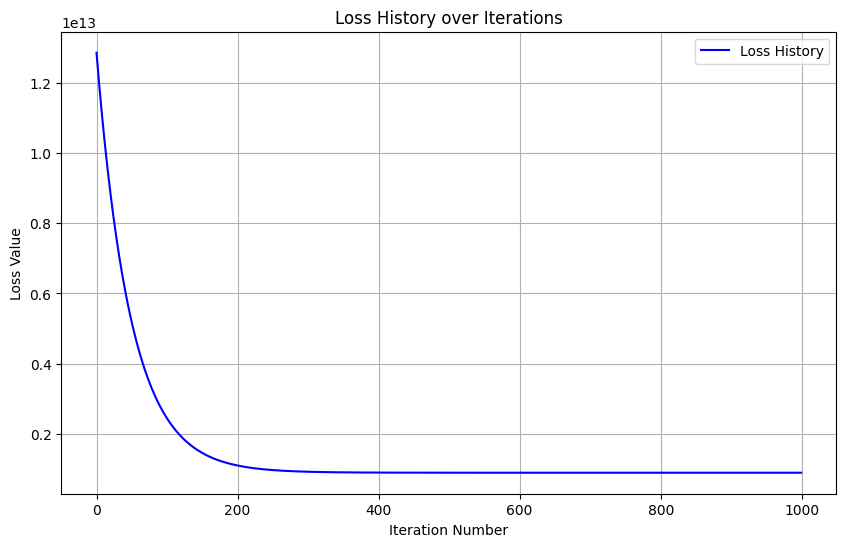

In [18]:
def gradient_descent_step(X, y, w, alpha):
    m = len(y)
    predictions = h(X, w)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    w = w - alpha * gradient
    current_loss = loss_func(X, y, w)
    return w, current_loss


w = np.zeros(X.shape[1])
alpha = 0.01
iterations = 1000

loss_history = []
for i in range(iterations):
    w, loss = gradient_descent_step(X, y, w, alpha)
    loss_history.append(loss)

print(f"Optimized weights: {w}")


plt.figure(figsize=(10, 6))
plt.plot(loss_history, label="Loss History", color="blue")
plt.title("Loss History over Iterations")
plt.xlabel("Iteration Number")
plt.ylabel("Loss Value")
plt.legend()
plt.grid(True)
plt.show()

5. знайдіть ці ж параметри за допомогою аналітичного рішення;

In [22]:
lr_model = LinearRegression().fit(X, y)
w_sklearn = lr_model.coef_

print(f"Optimized w (manual): {w[1:]}")
print(f"Coefficients (sklearn): {w_sklearn[1:]}")


Optimized w (manual): [821953.24685936 300575.90579754 696151.64754557]
Coefficients (sklearn): [821968.58935343 300259.16468032 696447.75898579]


6. порівняйте отримані результати.

Difference between prices calculated with manualy diffined and sklearn calculated weights: [-1182.41808537  -819.64948594  -748.38827386 -1382.0345837
 -1525.56828862 -3346.03790024]
Dataset min price = 1750000, max price = 13300000, mean price = 4766729.247706422


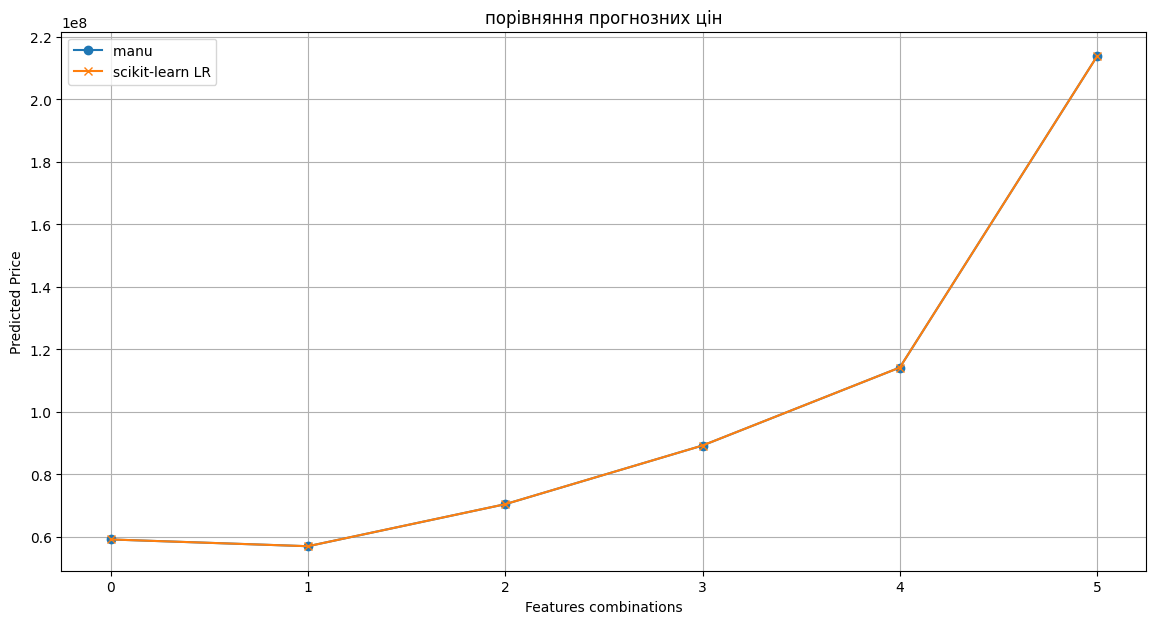

In [33]:
test_areas = np.array([65, 62, 78,  100, 130, 250])
test_bedrooms = np.array([1, 2, 3, 3, 4, 5])
test_bathrooms = np.array([1, 1, 1, 2, 2, 3])

test_combinations = np.column_stack(
    (np.ones(test_areas.shape[0]), test_areas, test_bedrooms, test_bathrooms)
)


predicted_prices_manual = h(test_combinations, w)

predicted_prices_lr = lr_model.predict(test_combinations)

p_difference = predicted_prices_manual - predicted_prices_lr
print("Difference between prices calculated with manualy diffined and sklearn calculated weights:", p_difference)
price_min = df["price"].min()
price_max = df["price"].max()
price_mean = df["price"].mean()

print(f"Dataset min price = {price_min}, max price = {price_max}, mean price = {price_mean}")

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(predicted_prices_manual, label="manu  ", marker="o")
plt.plot(predicted_prices_lr, label="scikit-learn LR", marker="x")
plt.title("порівняння прогнозних цін")
plt.xlabel("Features combinations")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

*** 
# Висновок:
***

Візулізація розрахунку прогнозних цін для тестових комбінацій вказує на те, що модель створено мануально та модель з бібліотеки sklearn дають приблизно однакові результати. 
Як показує  прогнозних "p_difference" ціни розраховані моделлю, створеною мануально, дещо нижчі, зважаючи на фактичні значення середньої/мініамльної та максимальної ціни у датасеті, таке відхилення можна вважати не суттєвим та допустимим.